In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from zipfile import ZipFile 
import seaborn as sb
import os
from sklearn.linear_model import LinearRegression
import time
#This block is just for importing relevant libraries

# Q1

## Correlations

- When given a data matrix, an easy way to tell if any two columns are correlated is to
look at a scatter plot of each column against each other column. For a warm up, do this:
Look at the data in DF1 in Lab2 Data.zip. Which columns are (pairwise) correlated?
Figure out how to do this with Pandas, and also how to do this with Seaborn.

- Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 X 4 matrix.
Explain why the numbers that you get fit with the plots you got.

- The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, Z = (X1;X2;X3) so that (X1;X2) and (X1;X3) are uncorre-
lated, but (X2;X3) are correlated. Specifically: choose a covariance matrix that has the
above correlations structure, and write this down. Then find a way to generate samples
from this Gaussian. Choose one of the non-zero covariance terms (Cij , if C denotes
your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.


         X1        X2        X3        X4
1  1.038502  0.899865  0.835053 -0.971528
2  0.320455 -0.647459  0.149079  0.352593
3  0.055480  2.234771  0.271672 -2.108739
4 -0.007260 -0.524299 -0.126550  0.670827
5 -1.237390 -1.377017 -1.049932  1.342079
From the scatterplots, it appears that column 0 and column 2 are correlated, as well as column 1 and column 3. Note that the original column zero has been dropped as it is just the observation number.

The formula for the covariance matrix of a dataset is given by: E[XX^T] - E[X](E[X]^T)
The covariance matrix of the dataset is: 
[[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]
Let Z = (X1, X2, X3), where K is the correlation matrix.
For the required relations, we have the correlation matrix as K = ([1, 0, 0], [0, 1, -1], [0, -1, 1])


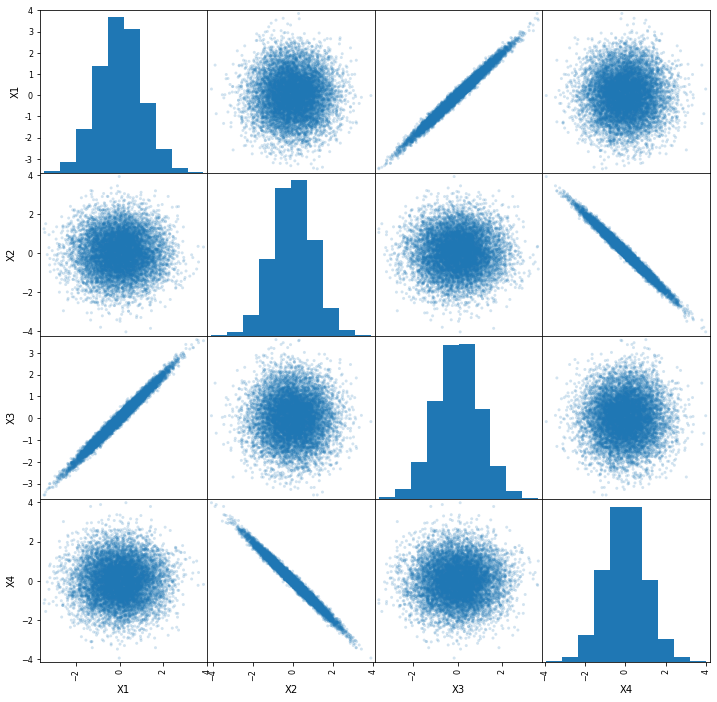

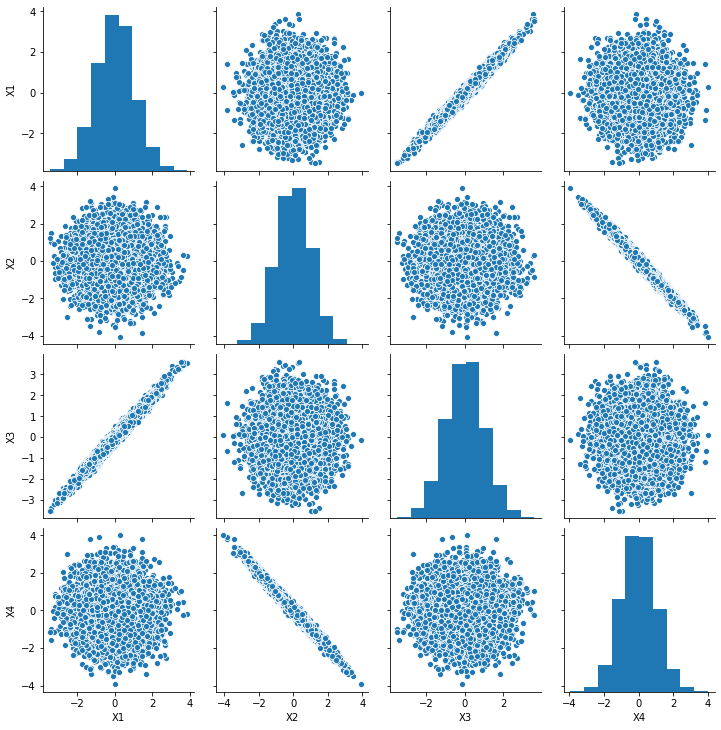

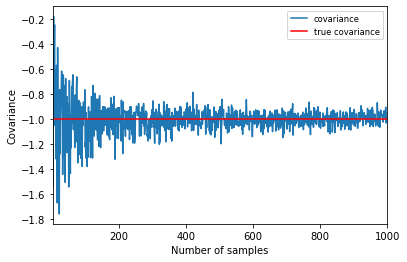

In [4]:
file_name = "Lab2_data.zip"

with ZipFile(file_name, 'r') as zip: 
    # extracting all the files 
    # print('Extracting all the files now...') 
    zip.extractall() 
    # print('Done')
    
header_list = ["X0", "X1", "X2", "X3", "X4"]
df1 = pd.read_csv("DF1", header = None, names = header_list)
df1 = df1.iloc[1:]
df1 = df1.drop(columns = ["X0"])
print(df1.head())

#df1.drop(0, axis=1)

from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=0.2, figsize=(12, 12) );
#diagonal='kde'

sb.pairplot(df1)

print("From the scatterplots, it appears that column 0 and column 2 are correlated, as well as column 1 and column 3. Note that the original column zero has been dropped as it is just the observation number.\n")

print("The formula for the covariance matrix of a dataset is given by: E[XX^T] - E[X](E[X]^T)")

print("The covariance matrix of the dataset is: ")
print(np.cov(np.transpose(df1)))


print("Let Z = (X1, X2, X3), where K is the correlation matrix.")
print("For the required relations, we have the correlation matrix as K = ([1, 0, 0], [0, 1, -1], [0, -1, 1])")

K = [[1, 0, 0], [0, 1, -1], [0, -1, 1]]
cov_obs = []
for i in range(998):
    Obs= np.random.multivariate_normal(mean = [0,0,0], cov=K, size = i+2)
    cov_mat = np.cov(np.transpose(Obs))
    cov_obs.append(cov_mat[2,1])
#print(cov_obs)


fig, ax = plt.subplots()
ax.set_xlabel('Number of samples') 
ax.set_ylabel('Covariance')
# set the xlim
ax.set_xlim(3, 1000)
dim = np.arange(3,1001,1);
actual_cov = [-1]*998
ax.plot(dim, cov_obs, label="covariance") 
ax.plot(dim, actual_cov, "r", label="true covariance") 
legend = ax.legend(loc='best', shadow=False, fontsize='small')
plt.show()

# Q2 


## Outliers. 

Consider the two-dimensional data in DF2 in Lab2 Data.zip. Look at a scatter plot of the data. It contains two points that look like potential outliers. Which one is "more" outlying? Propose a transformation of the data that makes it clear that the point at (-1, 1) is more outlying than the point at (5.5; 5), even though the latter point is "farther away" from the nearest points. Plot the data again after performing this transformation. Provide discussion as appropriate to justify your choice of transformation. Hint: if y comes from a standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity matrix), and 
Q = ((2   1/2),(1/2   2)),
what is the covariance matrix of the random variable z = Qy? If you are given z, how would you create a random Gaussian vector with covariance equal to the identity, using z?

       Col1      Col2
1  1.038502  0.835053
2  0.320455  0.149079
3  0.055480  0.271672
4 -0.007260 -0.126550
5 -1.237390 -1.049932


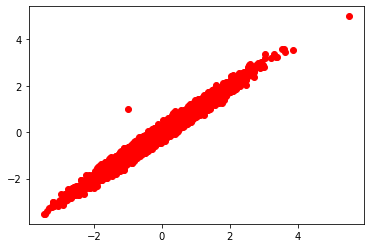

In [14]:
file_name = "Lab2_data.zip"

with ZipFile(file_name, 'r') as zip: 
    # extracting all the files 
    # print('Extracting all the files now...') 
    zip.extractall() 
    # print('Done')
    
header_list = ["Col0", "Col1", "Col2"]
df2 = pd.read_csv("DF2", header=None, names = header_list)
df2 = df2.iloc[1:]
df2 = df2.drop(columns = ["Col0"])
print(df2.head())

plt.scatter(df2['Col1'].to_numpy(), df2['Col2'].to_numpy())

In [15]:
Z = df2.to_numpy()
Z_cov = np.cov(Z, rowvar=False)
print('covariance of features: \n {}'.format(Z_cov))

e_val, e_vec = np.linalg.eig(Z_cov)
print('eigen_values: {}, \n eigen_vectors: \n {}'.format(e_val, e_vec))

projected = Z@e_vec

plt.scatter(projected[:,0], projected[:,1],  c = "g")

SyntaxError: invalid syntax (<ipython-input-15-fae84a4db9a8>, line 10)

# Q3


## Even More Standard Error 
(You may want to first look at the last written exercise below).

In one of the written exercises below, you derive an expression for what is called the Standard Error: where beta denotes the "truth," beta hat denotes the value we compute using least squares linear regression, and Z and e are as in the exercise below, you find:

beta hat - beta = Ze.

If we know the distribution of the noise (the distribution generating the noise vectors, e_i), then we know the distribution for the error, (beta hat - beta). This allows us to answer the question: if we solve a regression and obtain value beta hat, how can we tell if it is statistically significant? The answer is: we compare the size of beta hat to the spread introduced by the noise (i.e., the standard error), and we ask: what is the likelihood that the true beta = 0, and what we observed was
purely due to the noise. 

If the noise is Gaussian (normal), i.e., e_i ~ N(0; sigma^2), and if the values of the xi are normalized, then we expect error of the size sigma/sqrt(n), as this is roughly the standard deviation of the expression for the error that you derive above. This means: if you have twice the data points, you should expect the error to be reduced by about 1.4 (the formula says that the standard deviation of the error would decrease by a factor of 1/sqrt(2).

Compute this empirically, as follows: We will generate data for a regression problem, solve it, and see what the error is: Generate data as follows: x_i ~ N(0, 1), e_i ~ N(0, 1). Generate y by yi = beta_0 + x_i * beta + e_i, where beta_0 = -3 and beta = 0. Note that since beta = 0, this means that y and x are unrelated! The question we are exploring here is as follows: when we solve a regression problem, we are not going to find beta hat = 0 { we will find that beta hat takes some other values, hopefully close to zero. How do we know if the value of beta hat we get is statistically meaningful?

- By creating fresh data and each time computing beta hat and recording beta hat - beta, compute the empirical standard deviation of the error for n = 150. By running a linear regression of y vs. noise, we find beta hat = -0.15. Given your empirical computation of the standard deviation of the error, how significant is the value -0.15?

- Now repeat the above experiment for different values of n. Plot these values, and on the same plot, plot 1/sqrt(n). How is the fit?

The error is:  0.07616247511575722


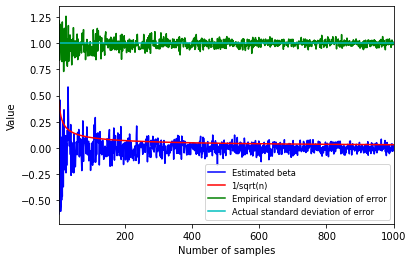

In [7]:
n_obs = 150
mu_x, sigma_x = 0, 1
mu_e, sigma_e = 0, 1
beta_0, beta_1 = -3, 0


Obs_x = np.random.normal(mu_x, sigma_x, n_obs)
Obs_e = np.random.normal(mu_e, sigma_e, n_obs)

Obs_y = ([beta_0]*n_obs) + (Obs_x * beta_1) + Obs_e
Obs_x_reshape = Obs_x.reshape((-1, 1))

model = LinearRegression().fit(Obs_x_reshape, Obs_y)
beta_est =  model.coef_[0]
#print(beta)
beta_hat = -0.15
e_stdev = np.std(Obs_e)
print("The error is: ",e_stdev/np.sqrt(n_obs))

beta = []
e_stdev_array = []
sqrt_array = []
for i in range(996):
    n_obs = i+5

    Obs_x = np.random.normal(mu_x, sigma_x, n_obs)
    Obs_e = np.random.normal(mu_e, sigma_e, n_obs)

    Obs_y = ([beta_0]*n_obs) + (Obs_x * beta_1) + Obs_e
    Obs_x_reshape = Obs_x.reshape((-1, 1))

    model = LinearRegression().fit(Obs_x_reshape, Obs_y)
    beta_est =  model.coef_[0]
    beta.append(beta_est)
    #print(beta)
    beta_hat = -0.15
    e_stdev = np.std(Obs_e)
    e_stdev_array.append(e_stdev)
    sqrt_array.append(1/np.sqrt(n_obs))
    #print("The error is: ",e_stdev/np.sqrt(n_obs))
    
fig, ax = plt.subplots()
ax.set_xlabel('Number of samples') 
ax.set_ylabel('Value')
# set the xlim
ax.set_xlim(5, 1000)
dim = np.arange(5, 1001,1)
actual_stdev = [1]*996
ax.plot(dim, beta,  "b", label="Estimated beta")
ax.plot(dim, sqrt_array, "r", label="1/sqrt(n)") 
ax.plot(dim, e_stdev_array, "g", label="Empirical standard deviation of error")
ax.plot(dim, actual_stdev, "c", label="Actual standard deviation of error") 

legend = ax.legend(loc='best', shadow=False, fontsize='small')
plt.show()

# Q4

## Names and Frequencies

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set. Download the file Names.zip from Canvas. This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

- Write a program that on input k and XXXX, returns the top k names from year XXXX.
- Write a program that on input Name returns the frequency for men and women of the name Name.
- It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years. Modify the above to return the relative frequency. Note that in the next coming lectures we will learn how to quantify diversity using entropy.
- Find all the names that used to be more popular for one gender, but then became more popular for another gender.
- (Optional) Find something cool about this data set.

['Sophia' 'Emma' 'Olivia' 'Noah' 'Liam' 'Jacob' 'Mason' 'Isabella'
 'William' 'Ethan']
The list of number of males with name  Mary  over the years is: [27, 29, 30, 32, 36, 38, 32, 47, 50, 41, 35, 39, 50, 55, 48, 47, 57, 63, 50, 50, 75, 58, 56, 63, 58, 68, 76, 70, 79, 80, 99, 98, 118, 126, 127, 159, 164, 159, 169, 155, 195, 187, 186, 203, 224, 260, 272, 283, 294, 327, 340, 325, 330, 316, 303, 276, 293, 288, 284, 272, 303, 315, 276, 254, 252, 198, 186, 184, 164, 170, 119, 161, 158, 146, 168, 149, 143, 184, 141, 170, 169, 167, 158, 136, 134, 136, 108, 127, 101, 108, 99, 86, 74, 54, 61, 66, 62, 52, 61, 65, 52, 67, 73, 57, 56, 67, 47, 69, 48, 74, 45, 32, 25, 18, 10, 13, 15, 13, 14, 11, 10, 13, 12, 9, 31, 10, 10, 10, 0, 0, 0, 0, 6, 0, 5, 0]
The list of number of females with name  Mary  over the years is: [7065, 6919, 8148, 8012, 9217, 9128, 9889, 9888, 11754, 11648, 12078, 11703, 13172, 12784, 13151, 13446, 13811, 13413, 14406, 13172, 16707, 13136, 14486, 14275, 14962, 16067, 16370, 17580, 

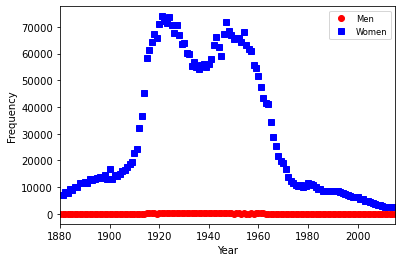

The list of percentage of males with name  Mary  over the years is: [0.013400700807019982, 0.015049611823805372, 0.013541939386279307, 0.014750282329622716, 0.014786641091254113, 0.015777192822207645, 0.01253334064444871, 0.01899788193826901, 0.016695940215177278, 0.014189404321884907, 0.011612436587801632, 0.013604255690241563, 0.014953181588446574, 0.016911525050580835, 0.014172168223636815, 0.01338939787592871, 0.015944680351118644, 0.018157817372707937, 0.013107499849263751, 0.014739045204651642, 0.016655119117411927, 0.016771924954310964, 0.014480237062166761, 0.016526540837607063, 0.01437436802347483, 0.016039967825711595, 0.017737903799879103, 0.01504098668872678, 0.01616672601287608, 0.015648503318460735, 0.016759237471623563, 0.015210990406211052, 0.011942606666201108, 0.011080878098028836, 0.008966868480045187, 0.00867677064784917, 0.008477980255611105, 0.007923069486814318, 0.007783810870897897, 0.007345028197800188, 0.00861790083845546, 0.008010397238597606, 0.0081249778856

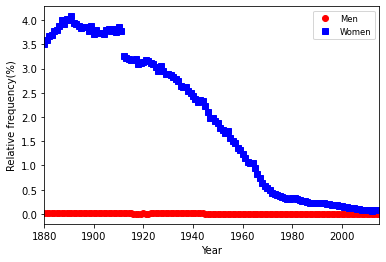

In [12]:
file_name = "Names.zip"

with ZipFile(file_name, 'r') as zip: 
    # extracting all the files 
    # print('Extracting all the files now...') 
    zip.extractall() 
    # print('Done') 

def top_k_year(k,year):
    file_name_parta = "Names/" + "yob" + str(year) + ".txt"
    header_list = ["Name", "Sex", "Freq"]
    df = pd.read_csv(file_name_parta, header=None, names = header_list)
    #print(df.head())
    print(df.sort_values(by='Freq', ascending=False)[:k]['Name'].values)
    return df.sort_values(by='Freq', ascending=False)[:k]['Name'].values

    
def name_freq(name):
    list_men = []
    list_women = []
    directory="Names/"
    for filename in os.listdir(directory):
        #print(filename)
        file_address = "Names/" + filename
        #print(file_address)
        header_list = ["Name", "Sex", "Freq", "Temp_label"]
        df = pd.read_csv(file_address,  header=None , names= header_list)
        df['Temp_label'] = df['Name']+df['Sex']
        #print(df.head())
        df_count_sorted = df['Temp_label'].value_counts()
        
        name_m = name+"M"
        x=0
        try:
            x = df_count_sorted.at[name_m]
        except KeyError:
            x = 0
        if(x>0):
            x=df[df.Temp_label == name_m].iloc[0].Freq
        else:
            x=0
        list_men.append(x)
        
        
        name_f = name+"F"
        x=0
        try:
            x = df_count_sorted.at[name_f]
        except KeyError:
            x = 0
        if(x>0):
            x=df[df.Temp_label == name_f].iloc[0].Freq
        else:
            x=0
        list_women.append(x)
        #print(df[df.Name == "Emma"].iloc[0].Freq)
        
    print("The list of number of males with name ",name," over the years is:",list_men)
    print("The list of number of females with name ",name," over the years is:",list_women)
    #a = plt.plot(list_men,'ro')
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Year') 
    ax.set_ylabel('Frequency')
    # set the xlim
    ax.set_xlim(1880, 2015)
    dim = np.arange(1880,2016,1);
    ax.plot(dim, list_men, 'ro', label="Men") 
    ax.plot(dim, list_women,"bs", label="Women")
    legend = ax.legend(loc='best', shadow=False, fontsize='small')
    plt.show()
    
    
    
def name_relative_freq(name):
    list_men = []
    list_women = []
    directory="Names/"
    for filename in os.listdir(directory):
        #print(filename)
        file_address = "Names/" + filename
        #print(file_address)
        header_list = ["Name", "Sex", "Freq", "Temp_label"]
        df = pd.read_csv(file_address,  header=None , names= header_list)
        df['Temp_label'] = df['Name']+df['Sex']
        #print(df.head())
        df_count_sorted = df['Temp_label'].value_counts()
        
        name_m = name+"M"
        x=0
        try:
            x = df_count_sorted.at[name_m]
        except KeyError:
            x = 0
        if(x>0):
            x=df[df.Temp_label == name_m].iloc[0].Freq
        else:
            x=0
        y=df.sum(axis=0, skipna=True)
        #print(y.Freq)
        list_men.append((100*x)/(y.Freq))
        
        
        name_f = name+"F"
        x=0
        try:
            x = df_count_sorted.at[name_f]
        except KeyError:
            x = 0
        if(x>0):
            x=df[df.Temp_label == name_f].iloc[0].Freq
        else:
            x=0
        list_women.append((100*x)/(y.Freq))
        #print(df[df.Name == "Emma"].iloc[0].Freq)
        
    print("The list of percentage of males with name ",name," over the years is:",list_men)
    print("The list of percentage of females with name ",name," over the years is:",list_women)
    #a = plt.plot(list_men,'ro')
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Year') 
    ax.set_ylabel('Relative frequency(%)')
    # set the xlim
    ax.set_xlim(1880, 2015)
    dim = np.arange(1880,2016,1);
    ax.plot(dim, list_men, 'ro', label="Men") 
    ax.plot(dim, list_women,"bs", label="Women")
    legend = ax.legend(loc='best', shadow=False, fontsize='small')
    plt.show()

# def find_gender_flip():
#     list_names = []
#     directory="Names/"
#     for filename in os.listdir(directory):
#         #print(filename)
#         file_address = "Names/" + filename
#         #print(file_address)
#         header_list = ["Name", "Sex", "Freq", "Temp_label"]
#         df = pd.read_csv(file_address,  header=None , names= header_list)
#         df['Temp_label'] = df['Name']+df['Sex']
        
#         names_temp = df["Name"]
#         #print(names_temp.tolist())
#         list_names = list_names + (names_temp.tolist())
#         list_names = list(dict.fromkeys(list_names))
#     #print(names_temp.tolist())
#     name_ref = pd.DataFrame(columns = ["Name","ref"], index = list_names)
#     name_ref["Name"] = list_names
#     name_ref['ref'] = name_ref.index if name_ref.index.is_monotonic_increasing else range(len(name_ref))
#     #print(name_ref.head())
    
#     #df.at[dates[0], 'A']
#     M_count = np.zeros((len(list_names), 136))
#     F_count = np.zeros((len(list_names), 136))
    
#     i = 0
#     for filename in os.listdir(directory):
#         file_address = "Names/" + filename
#         header_list = ["Name", "Sex", "Freq", "Temp_label"]
#         df5 = pd.read_csv(file_address,  header=None , names= header_list)
#         df5['Temp_label'] = df5['Name']+df5['Sex']
#         for ind in df5.index:
#             if(df5['Sex'][ind] == "M"):
#                 M_count[int(name_ref.loc[df5["Name"][ind], ["ref"]])][i] = df5["Freq"][ind]
#             else:
#                 F_count[int(name_ref.loc[df5["Name"][ind], ["ref"]])][i] = df5["Freq"][ind]
#         i = i+1
#         print(i)
        
#     MF_count = np.subtract(M_count, F_count)
#     maxinCol = np.amax(MF_count, axis=1)
#     mininCol = np.amin(MF_count, axis=1)
    
#     print(maxinCol)
#     print(mininCol)
    
#     list_gender_flip = []
    
#     for i in range(len(list_names)):
#         if((maxinCol[i] * mininCol[i]) < 0):
#             list_gender_flip.append(name_ref.loc[name_ref["ref"][i],["Name"]])
        

# #         for row in df5.itertuples(index=True, name='Pandas'):
# #             name_temp = getattr(row, "Name")
# #             male_count = 0
# #             series_temp = df5[df5['Temp_label'] == name_temp+"M"]
# #             print(len(series_temp.index))
# #             if(len(series_temp.index)==0):
# #                 male_count = 0
# #             else:
# #                 male_count_temp = series_temp.loc[:,"Freq"].values
# #                 male_count = int(male_count_temp[0])
# #             #print(male_count)
            
# #             female_count = 0
# #             series_temp = df5[df5['Temp_label'] == name_temp+"F"]
# #             print(len(series_temp.index))
# #             if(len(series_temp.index)==0):
# #                 female_count = 0
# #             else:
# #                 female_count_temp = series_temp.loc[:,"Freq"].values
# #                 female_count = int(male_count_temp[0])
# #             #print(female_count)
# #             MF_count = male_count - female_count
# #             temp_max = df.loc[(df['Name'] == name_temp)]["MF_max"].values
# #             temp_min = df.loc[(df['Name'] == name_temp)]["MF_min"].values
            
# #             if(MF_count > temp_max[0]):
# #                 df.loc[(df['Name'] == name_temp)]["MF_max"].values[0] = temp_max
# #             else:
# #                 temp_max = 0
                
# #             if(MF_count < temp_min[0]):
# #                 df.loc[(df['Name'] == name_temp)]["MF_min"].values[0] = temp_min
# #             else:
# #                 temp_min = 0
#     return list_gender_flip
    

# start_time = time.time()
# a = find_gender_flip()
# print("--- %s seconds ---" % (time.time() - start_time))
# print(a)


top_k_year(10, 2013)
name_freq("Mary")
name_relative_freq("Mary")

# Q4 - d 

In [ ]:
folder_path = 'Names'

def get_file(year=1880):
    year = str(year)
    text_file = os.path.join(folder_path, 'yob' + year + '.txt')
    df = pd.read_csv(text_file, header=None)
    df.rename(columns = {0:'Name', 1:'Sex', 2:'Freq'}, inplace=True)
    return df

df = get_file(1880)


df.head(5)

df.sort_values(by='Freq', ascending=False)

def topk(k=5, year=1880):
    df = get_file(year)
    return df.sort_values(by='Freq', ascending=False)[:k-1]['Name'].values

#topk()

def name_freq(name='John', years=list(np.arange(1880,2016,1))):
    frames = []
    if not isinstance(years,list):
        years = [years]
    for year in years:
        df = get_file(year)
        cur_df = df[df['Name']==name]
        cur_df['Year'] = year
        cur_df['Rel_Freq'] = df['Freq']/df['Freq'].sum()
        cur_df['Pop'] = df['Freq']/df['Freq'].sum()
        frames.append(cur_df)
        yearly_freq = pd.concat(frames)
        yearly_freq.reset_index(drop=True,inplace=True)
    return yearly_freq

#name_freq_df = name_freq()

frames = []
years = np.arange(1880, 2016, 1)
for year in years:
    df = get_file(year)
    df.groupby(['Sex','Name']).sum()
    df['MF_diff'] = df.sort_values(['Sex','Name','Freq']).groupby(['Name'])['Freq'].diff()
    df['Year'] = year
    df.dropna(inplace=True)
    frames.append(df)
    
    
yearly_freq = pd.concat(frames)
yearly_freq.reset_index(drop=True,inplace=True)



unique_names = yearly_freq['Name'].unique()
for name in unique_names:
    mf_diff = yearly_freq[yearly_freq['Name']==name]['MF_diff'].to_numpy()
    num_flips = ((np.diff(np.sign(mf_diff)) != 0)*1).sum()
    if num_flips > 0:
        print('name: {}'.format(name))
